In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
from scipy.stats import gmean
import sarchl

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [2]:
dcu_data = pd.read_csv('./DCUL1scalar_mb.csv',index_col=0)
# print(dcu_data.columns)
dcu_data['64'] = dcu_data['64']/dcu_data['8']
dcu_data['32'] = dcu_data['32']/dcu_data['8']
dcu_data['16'] = dcu_data['16']/dcu_data['8']
dcu_data['8'] = dcu_data['8']/dcu_data['8']
dcu_data.columns=['Benchmark','32','64','128','256']
# dcu_data

dcu_data = dcu_data.melt(id_vars=['Benchmark'],value_vars=['32','64','128','256'])
dcu_data.columns=['Benchmark','NumDCU','Normalized\nExecution Time']

In [3]:
dcu_data

Benchmark NumDCU  Normalized\nExecution Time
0       ATAX     32                    1.000000
1       BICG     32                    1.000000
2         BS     32                    1.000000
3        FIR     32                    1.000000
4        FLW     32                    1.000000
5        FWT     32                    1.000000
6         KM     32                    1.000000
7         MT     32                    1.000000
8         PR     32                    1.000000
9       ReLU     32                    1.000000
10      SPMV     32                    1.000000
11      ATAX     64                    0.925900
12      BICG     64                    1.010177
13        BS     64                    0.941034
14       FIR     64                    0.508805
15       FLW     64                    0.855553
16       FWT     64                    0.531360
17        KM     64                    0.536711
18        MT     64                    0.544788
19        PR     64                    0.999825
20      ReLU     64                    1.000000
21      SPMV     64                    0.639794
22      ATAX    128                    0.929356
23      BICG    128                    1.024895
24        BS    128                    0.875954
25       FIR    128                    0.472173
26       FLW    128                    0.849193
27       FWT    128                    0.479179
28        KM    128                    0.266212
29        MT    128                    0.348345
30        PR    128                    0.999706
31      ReLU    128                    0.999999
32      SPMV    128                    0.634163
33      ATAX    256                    0.931411
34      BICG    256                    0.985894
35        BS    256                    0.871324
36       FIR    256                    0.472170
37       FLW    256                    0.848415
38       FWT    256                    0.451395
39        KM    256                    0.131880
40        MT    256                    0.316591
41        PR    256                    0.999551
42      ReLU    256                    0.999998
43      SPMV    256                    0.621157

In [4]:
palt = sarchl.sequential_palette(4)
palt

['#02090a', '#1b5f71', '#3bb1d1', '#a2dae9']

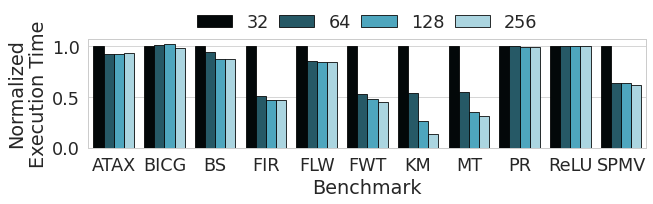

In [5]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=dcu_data, 
            x='Benchmark', hue='NumDCU', y='Normalized\nExecution Time', 
            palette=palt, ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=5)
# ax.set_ylim(0.9, 1.70)
# ax.set_yticks([1.0, 1.3, 1.6])
plt.savefig('DCUL1scalar_mb.pdf', bbox_inches='tight')
plt.show()
